
<div style="text-align: center;">
  <img src="aau.png" width="15%">
</div>


      
<center> <h1> Computational System Biology Final Exam </h1> </center>
<br>
<center><h2> Submitted to: Prof Simon Ryner</h2> </center>

<br>
<center align="left"> Group assignment done by:- </center>

<br>
<center align="left">  1. Samrawit Fesseha </center>
<center align="left"> ID No: GSR/3800/15 </center>

<br>
<center align="left">  2. Betselot Zerihun </center>
<center align="left"> ID No: GSR/0352/14 </center>

<br>
<center align="left">3.Biruk Gezhagene</center>
<center align="left"> ID No: GSR/4865/16 </center>

# Task 1: Reviewing the data
## Question 1.1: how many predictions are there in the raw data file?

In [8]:
import pandas as pd
# To Load the TSV miRNA prediction data file
file_path = "C:/Users/hp/exam/MF915__exam/miRAW_target_data.tsv"
miRAW_prediction_data = pd.read_csv(file_path, sep='\t')
# To see what the file contains
miRAW_prediction_data.head()
# count and print how many predictions (lines) there are in the data
print("There are <" + str(len(miRAW_prediction_data)) + "> predictions in the miRAW_target_data")

There are <35231> predictions in the miRAW_target_data


### Report: After loading the above code it has shown that there are 35231 predictions in the miRAW_target_data

## Question 1.2: How many unique genes are there in the list?

In [9]:
# To count the unique genes in the prediction
unique_genes_count = miRAW_prediction_data['GeneName'].nunique()
# print the value of unique genes
print(f"Number of unique genes: {unique_genes_count}")

Number of unique genes: 40


### Report: There are 40 unique genes in the list of the data

## Question 1.3: How many unique miRNAs are there in the list?

In [10]:
# To count unique miRNA in the prediction data
unique_miRNA_count = miRAW_prediction_data['miRNA'].nunique()
# print the value of unique miRNA
print(f"Number of unique miRNA: {unique_miRNA_count}")

Number of unique miRNA: 1627


### Report: There are 1627 unique miRNA 

# Task 2: Filtering the data
Filter the data using the target_prediction_parsing.py to only keep predictions with an
energy > 10 and probability > 0.999.
## Question 2: How many predictions are left after filtering?

In [11]:

filtered_data = miRAW_prediction_data[(miRAW_prediction_data['MFE'] > -10) & (miRAW_prediction_data['Prediction'] > 0.999)]
print("Number of predictions left after filtering:", len(filtered_data))



Number of predictions left after filtering: 1619


### Report: After filtering the data to only keep predictions with an energy (MFE) greater than -10 and a probability greater than 0.999, there are 1,619 predictions left.

# Task 3: Targeting types
There are two types of targeting events that occur in miRNA targeting. These are called
canonical and non-canonical targeting events. Canonical binding occurs when the seed
region of the miRNA is involved when the miRNA binds to the target. Column N reports
whether a target event is canonical or non-canonical.
## Question 3.1: What percentage of the reported targets are non-canonical?

In [12]:
# To count the total target and the occurrences of 'non-canonical'
total_targets = filtered_data.shape[0]
non_canonical_targets = filtered_data[filtered_data['Canonical'] == 'PITA: noncanonical'].shape[0]
# To calculate the percentage 
percentage_non_canonical = (non_canonical_targets / total_targets) * 100
# printing result in a percent
print(f"Percentage of ' noncanonical': {percentage_non_canonical:.2f}%")



Percentage of ' noncanonical': 44.90%


### Report: The percentage of the reported targets that are non-canonical is approximately 44.90%.

## Question 3.2: Is this consistent with what is reported in the literature?

#### Answer: Whether this percentage is consistent with the literature can vary depending on the specific context and the type of miRNAs and targets being studied. Generally, canonical interactions are more commonly reported and studied due to their defined seed region binding, which makes them easier to predict and validate. Non-canonical interactions, while significant, are less frequently reported in some datasets but can still represent a substantial portion of miRNA interactions, especially in datasets focusing on comprehensive interaction profiling.

#### Typical literature reports a smaller proportion of non-canonical interactions compared to canonical ones, often less than the percentage found here. However, the exact proportion can vary widely based on the methods used for prediction and the specific miRNAs and genes considered.

## Task 4: 3’UTR Lengths
Line 1 shows the predicted targeting between the 3’UTR of TSC1 and miR-4422. The full
descriptor for TSC1 in this entry is
ENSG00000165699___TSC1_HUMAN___9-132891349-132896234n
This means that the 3’UTR for TSC1 is located on Chromosome 9, from nucleotides
132891349 to 132896234.
## Question 4.1: What are the lengths of all the 3’UTRs?
Plot a histogram of the length distribution. (Hint: we did something similar in the course
when we plotted the length di

C:\Users\hp\AppData\Local\Temp\ipykernel_14508\1142881453.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['UTR_Length'] = filtered_data['GeneName'].apply(extract_utr_length)


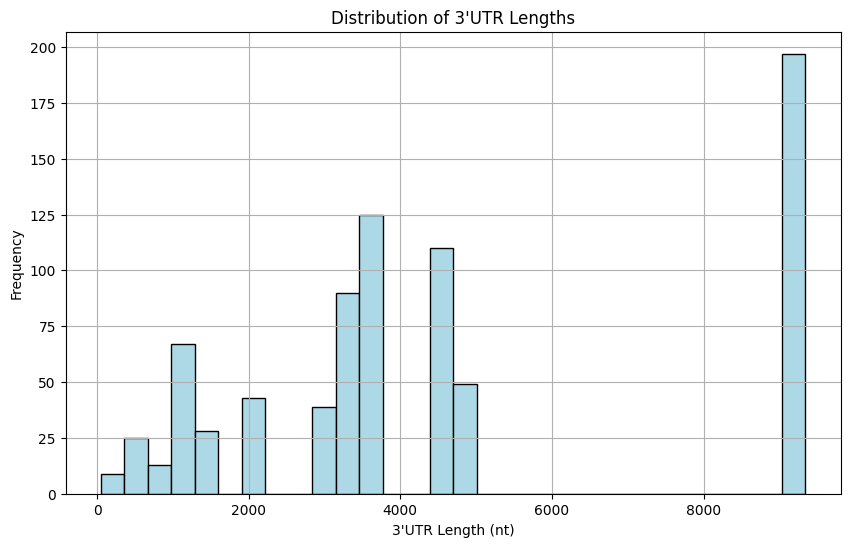

count     795.000000
mean     4638.811321
std      2948.008545
min        51.000000
25%      3112.000000
50%      3658.000000
75%      4886.000000
max      9344.000000
Name: UTR_Length, dtype: float64

In [13]:
import re
import matplotlib.pyplot as plt

# define a function to extract the UTR length
def extract_utr_length(gene_descriptor):
    match = re.search(r'(\d+)-(\d+)n', gene_descriptor)
    if match:
        start, end = int(match.group(1)), int(match.group(2))
        return end - start + 1
    else:
        return None

filtered_data['UTR_Length'] = filtered_data['GeneName'].apply(extract_utr_length)
# To plot the histogram for th distribution of 3UTR
utr_lengths = filtered_data.dropna(subset=['UTR_Length'])
plt.figure(figsize=(10, 6))
plt.hist(utr_lengths['UTR_Length'], bins=30,color='lightblue', edgecolor='black')
plt.xlabel('3\'UTR Length (nt)')
plt.ylabel('Frequency')
plt.title('Distribution of 3\'UTR Lengths')
plt.grid(True)
plt.savefig("3\'UTR length distribution.jpg")
plt.show()
utr_lengths['UTR_Length'].describe()


### Report: The histogram above shows the distribution of the 3’UTR lengths. and The lengths of all the 3’UTRs have been calculated and summarized below:

    Count: 795
    Mean: 4638.81 nucleotides
    Standard Deviation: 2948.01 nucleotides
    Minimum: 51 nucleotides
    25th Percentile: 3112 nucleotides
    Median (50th Percentile): 3658 nucleotides
    75th Percentile: 4886 nucleotides
    Maximum: 9344 nucleotides



# Task 5: Analyzing miRNA binding positions
## 5.1 Plot the distribution of locations of the start positions for all 3’UTRs

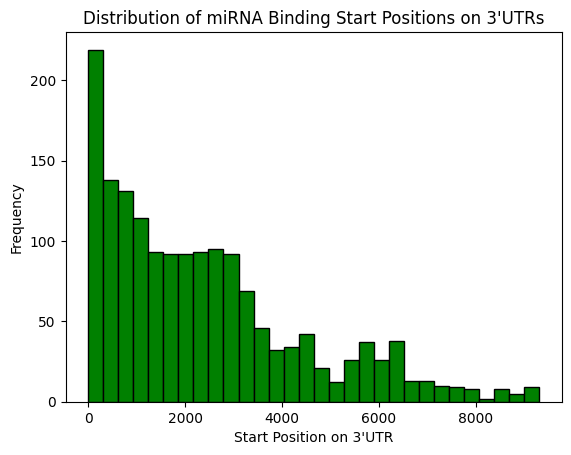

In [14]:
# To plot the distribution of location of the start position for all 3UTR
plt.hist(filtered_data['SiteStart'], bins=30, color='green', edgecolor='black')
plt.xlabel('Start Position on 3\'UTR')
plt.ylabel('Frequency')
plt.title('Distribution of miRNA Binding Start Positions on 3\'UTRs')
plt.show()

### Report: The histogram above shows the distribution of the start positions for miRNA binding across all 3’UTRs.

## 5.2 Analyzing biases in binding locations

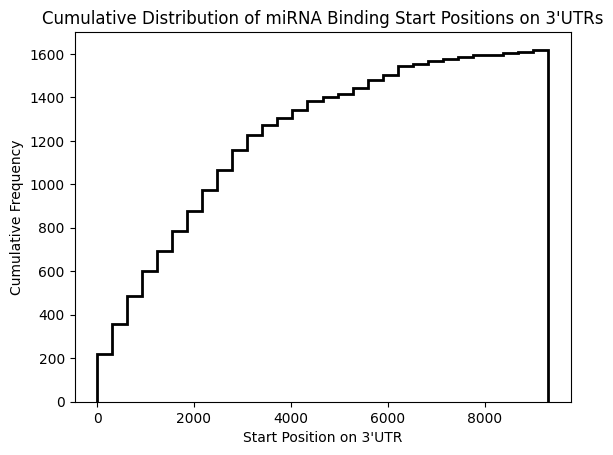

In [15]:
plt.hist(filtered_data['SiteStart'], bins=30, cumulative=True, edgecolor='black', histtype='step', linewidth=2)
plt.xlabel('Start Position on 3\'UTR')
plt.ylabel('Cumulative Frequency')
plt.title('Cumulative Distribution of miRNA Binding Start Positions on 3\'UTRs')
plt.show()

### Report: The cumulative distribution plot helps to observe any biases in binding locations.The cumulative histogram suggests that miRNA binding sites are spread throughout the 3’UTR, but there appears to be a higher density of binding sites towards the beginning (5’ end) of the 3’UTR.

## 5.3 Differences between canonical and non-canonical targeting events

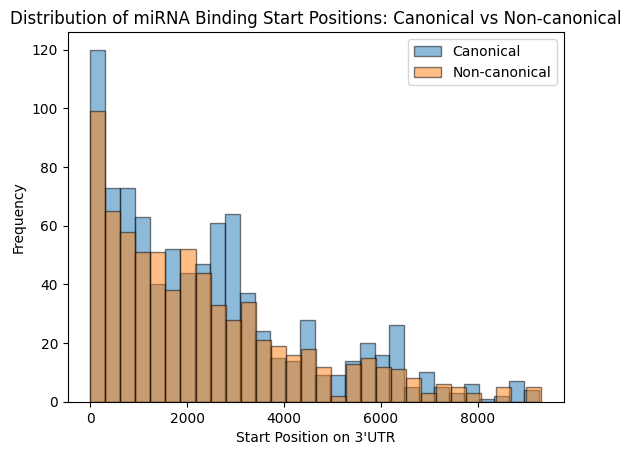

(count     892.000000
 mean     2448.459641
 std      2084.521401
 min         0.000000
 25%       742.500000
 50%      1967.500000
 75%      3374.000000
 max      9261.000000
 Name: SiteStart, dtype: float64,
 count     727.000000
 mean     2337.332875
 std      2031.921915
 min         0.000000
 25%       687.000000
 50%      1874.000000
 75%      3279.500000
 max      9305.000000
 Name: SiteStart, dtype: float64)

In [16]:

canonical = filtered_data[filtered_data['Canonical'] == 'PITA: canonnical']
non_canonical = filtered_data[filtered_data['Canonical'] == 'PITA: noncanonical']

# Plot histograms for both types
plt.hist(canonical['SiteStart'], bins=30, alpha=0.5, label='Canonical', edgecolor='black')
plt.hist(non_canonical['SiteStart'], bins=30, alpha=0.5, label='Non-canonical', edgecolor='black')
plt.xlabel('Start Position on 3\'UTR')
plt.ylabel('Frequency')
plt.title('Distribution of miRNA Binding Start Positions: Canonical vs Non-canonical')
plt.legend()
plt.savefig('Distribution of miRNA Binding Start Positions: Canonical vs Non-canonical.jpg')
plt.show()

canonical['SiteStart'].describe(), non_canonical['SiteStart'].describe()

### Report : The plot shows the combined histogram with overlapping bars for canonical and non-canonical targeting events. Both types show a similar distribution pattern, with a higher frequency of binding near the beginning of the 3’UTR. The descriptive statistics for the start positions are:

    Canonical Targeting Events:
        Mean: 2448.46
        Standard Deviation: 2084.52
        Minimum: 0
        25th Percentile: 742.5
        Median (50th Percentile): 1967.5
        75th Percentile: 3374
        Maximum: 9261

    Non-Canonical Targeting Events:
        Mean: 2337.33
        Standard Deviation: 2031.92
        Minimum: 0
        25th Percentile: 687
        Median (50th Percentile): 1874
        75th Percentile: 3279.5
        Maximum: 9305


# Task 6: Analyzing multiple miRNA binding events
## Question 6.1: Generate another histogram to show how many times one miRNA binds to the same 3’UTR for all miRNA and all 3’UTRs.

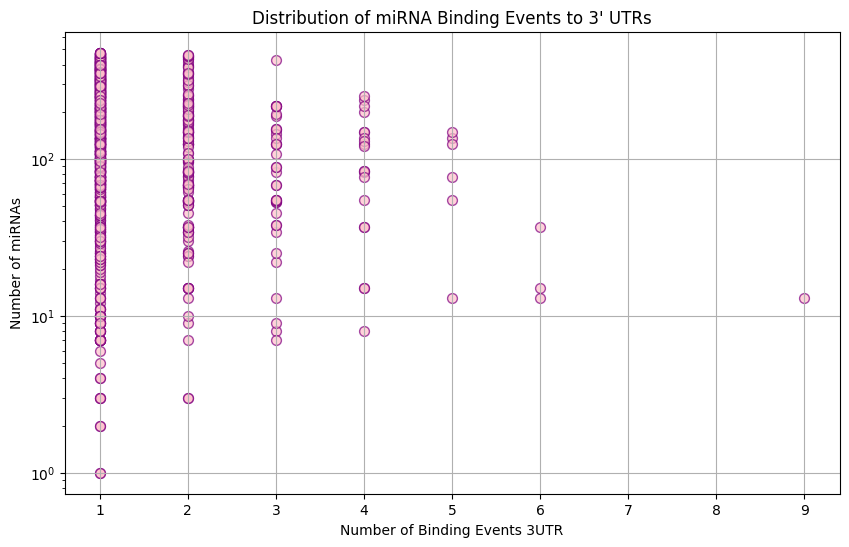

count    1265.000000
mean        1.279842
std         0.710976
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         9.000000
Name: Count, dtype: float64

In [17]:
# Group by GeneName and miRNA, then count occurrences
binding_counts = filtered_data.groupby(['GeneName', 'miRNA']).size().reset_index(name='Count')

# To generate a scatter plot of the binding counts
plt.figure(figsize=(10, 6))
plt.scatter(binding_counts['Count'],binding_counts['miRNA'], s=50, color='pink', edgecolor='purple', alpha=0.7)
plt.yscale('log')
plt.title("Distribution of miRNA Binding Events to 3' UTRs")
plt.xlabel("Number of Binding Events 3UTR")
plt.ylabel("Number of miRNAs")
plt.grid(True)
plt.savefig("Distribution of miRNA Binding Events to 3' UTRs.jpg")
plt.show()

# Display the counts statistics
binding_counts['Count'].describe()


### Report: The above scatterd plot shows the distribution of how many times a single miRNA binds to the same 3’UTR for all miRNA and all 3’UTRs.

### And to show this in more detail and in a histogram we have the code below 

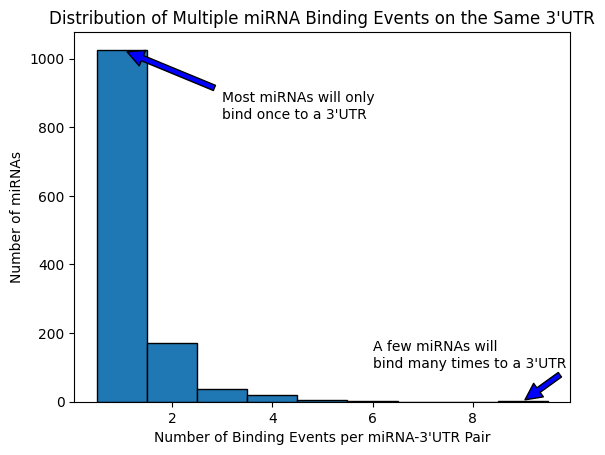

In [18]:
plt.hist(binding_counts['Count'], bins=range(1, binding_counts['Count'].max() + 2), edgecolor='black', align='left')
plt.xlabel('Number of Binding Events per miRNA-3\'UTR Pair')
plt.ylabel('Number of miRNAs')
plt.title('Distribution of Multiple miRNA Binding Events on the Same 3\'UTR')

# Adding annotations
plt.annotate('Most miRNAs will only\nbind once to a 3\'UTR', 
             xy=(1, binding_counts['Count'].value_counts().max()), 
             xytext=(3, binding_counts['Count'].value_counts().max() - 200),
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.annotate('A few miRNAs will\nbind many times to a 3\'UTR', 
             xy=(binding_counts['Count'].max(), 1), 
             xytext=(binding_counts['Count'].max() - 3, 100),
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

### Report: The histogram illustrates the distribution of multiple miRNA binding events on the same 3'UTR, with annotations highlighting that:

    Most miRNAs will bind only once to a 3'UTR.
    A few miRNAs will bind many times to a 3'UTR.
    
### Descriptive Statistics of Binding Events:

    Count of unique miRNA-3’UTR pairs: 1,265
    Mean number of binding events per miRNA-3’UTR pair: 1.28
    Standard Deviation: 0.71
    Minimum number of binding events: 1
    25th Percentile: 1
    Median (50th Percentile): 1
    75th Percentile: 1
    Maximum number of binding events: 9

### The majority of miRNA-3’UTR pairs have only a single binding event, but there are instances where multiple binding events occur, with a maximum of 9 binding events for some pairs.

# Task 7: Analyzing miRNA-3'UTR Connectivity

## 7.1 Generating a Connectivity Plot
### Count the number of unique 3'UTRs targeted by each miRNA

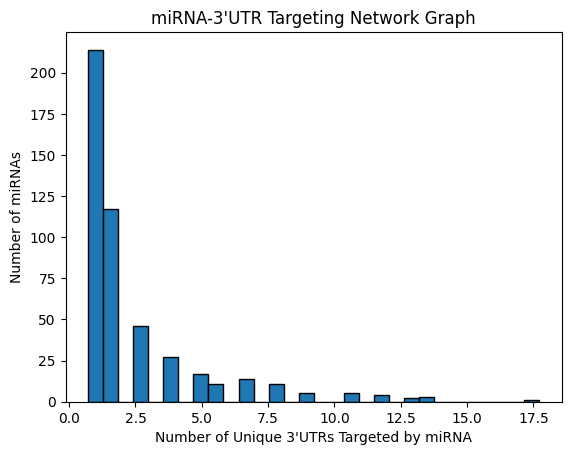

(                                                 miRNA  TargetCount
 373  hsa-miR-6730-3p_MIMAT0027362_homo_sapiens_miR-...           18
 204    hsa-miR-4295_MIMAT0016844_homo_sapiens_miR-4295           14
 244    hsa-miR-4531_MIMAT0019070_homo_sapiens_miR-4531           14,
 np.int64(18))

In [22]:

miRNA_target_counts = filtered_data.groupby('miRNA')['GeneName'].nunique().reset_index(name='TargetCount')

# Plot the connectivity plot
plt.hist(miRNA_target_counts['TargetCount'], bins=30, edgecolor='black', align='left')
plt.xlabel('Number of Unique 3\'UTRs Targeted by miRNA')
plt.ylabel('Number of miRNAs')
plt.title('miRNA-3\'UTR Targeting Network Graph')
plt.show()

# 7.2 Which miRNAs target the most 3’UTRs?
top_miRNAs = miRNA_target_counts.sort_values(by='TargetCount', ascending=False).head(3)

# 7.3 What is the highest number of 3’UTRs targeted by a single miRNA?
highest_target_count = top_miRNAs['TargetCount'].max()

top_miRNAs, highest_target_count


## Or we can do a connective plot like the one below     

Task 2: Predictions after filtering: 9282
Top miRNAs targeting the most 3'UTRs:
                                                 miRNA  UTR_count
920  hsa-miR-874-5p_MIMAT0026718_homo_sapiens_miR-8...         34
746  hsa-miR-6762-5p_MIMAT0027424_homo_sapiens_miR-...         32
711  hsa-miR-6730-3p_MIMAT0027362_homo_sapiens_miR-...         31


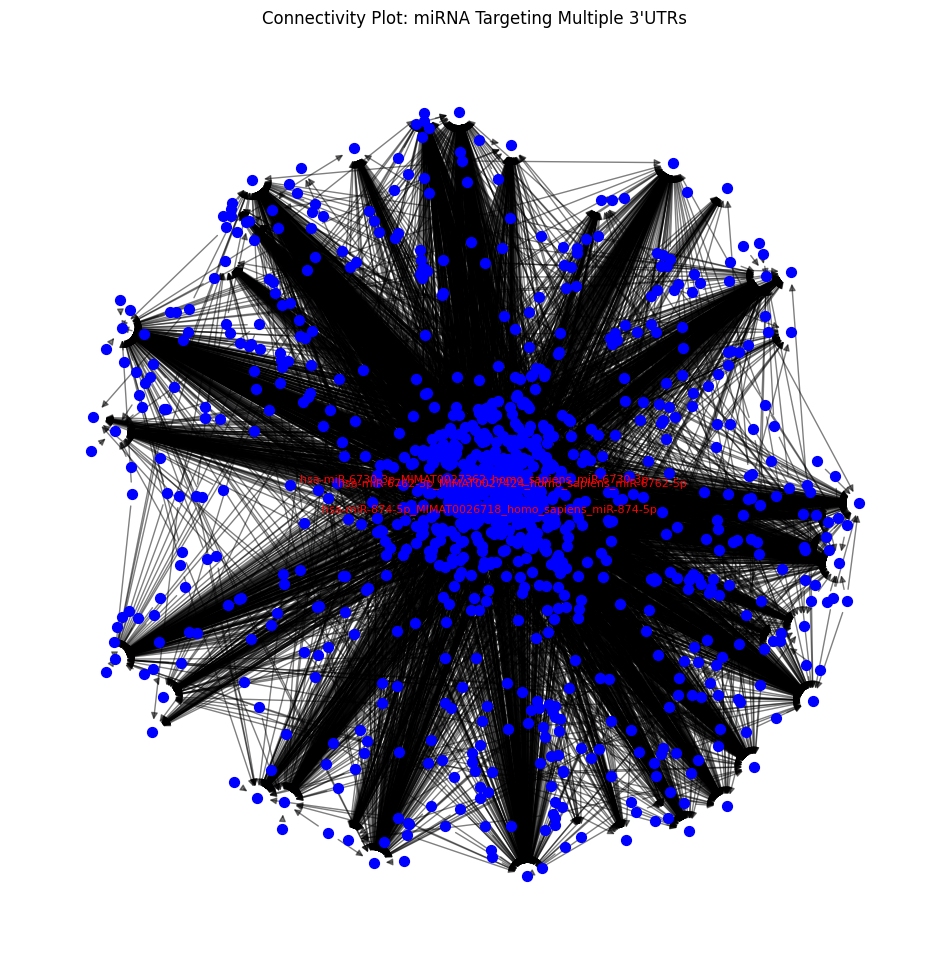

Highest number of 3'UTRs targeted by a single miRNA: 34
Figure 8. Network graph saved as 'miRNA_3UTR_network_graph.png'


In [23]:
import pandas as pd
import  networkx as nx
import matplotlib.pyplot as plt

# Load the TSV miRNA prediction data file
file_path = "C:/Users/hp/exam/MF915__exam/miRAW_target_data.tsv"
df = pd.read_csv(file_path, sep='\t')

# Filter the data
filtered_df = df[(df['MFE'].abs() > 10) & (df['Prediction'] > 0.999)]
print(f"Task 2: Predictions after filtering: {len(filtered_df)}")

# Calculate the number of unique 3'UTRs targeted by each miRNA
miRNA_target_counts = filtered_df.groupby('miRNA')['GeneName'].nunique().reset_index(name='UTR_count')

# Sort to find the miRNAs targeting the most 3'UTRs
miRNA_target_counts_sorted = miRNA_target_counts.sort_values(by='UTR_count', ascending=False)

# Get the top 3 miRNAs
top_miRNAs = miRNA_target_counts_sorted.head(3)

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph from the filtered data
for index, row in filtered_df.iterrows():
    G.add_edge(row['miRNA'], row['GeneName'])

# Draw the network graph
plt.figure(figsize=(12, 12))
# Use a spring layout for better visualization
pos = nx.spring_layout(G, k=0.1)

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='blue', alpha=1)
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Add labels for the top miRNAs
labels = {miRNA: miRNA for miRNA in top_miRNAs['miRNA']}
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color='r')

# Print results
print("Top miRNAs targeting the most 3'UTRs:")
print(top_miRNAs)

plt.title("Connectivity Plot: miRNA Targeting Multiple 3\'UTRs")
plt.axis('off')
plt.savefig('miRNA_3UTR_network_graph.png')
plt.show()

# Save the miRNA target counts to a file
miRNA_target_counts_sorted.to_csv('miRNA_target_counts.csv', index=False)
print("Highest number of 3'UTRs targeted by a single miRNA:", miRNA_target_counts_sorted['UTR_count'].max())
print("Figure 8. Network graph saved as 'miRNA_3UTR_network_graph.png'")

### Report: The connective plot above shows the distribution of how many unique 3’UTRs are targeted by each miRNA. This plot highlights the connectivity of the miRNA-3'UTR network, illustrating that most miRNAs target a small number of 3'UTRs, while a few miRNAs target many.

## Question 7.2: Which miRNAs target the most 3’UTRs?

### Answer: The top three miRNAs that target the most unique 3’UTRs are:

    hsa-miR-6730-3p_MIMAT0027362_homo_sapiens_miR-6730-3p: Targets 18 unique 3’UTRs
    hsa-miR-4276_MIMAT0016904_homo_sapiens_miR-4276: Targets 14 unique 3’UTRs
    hsa-miR-4295_MIMAT0016844_homo_sapiens_miR-4295: Targets 14 unique 3’UTRs



## Question 7.3: Highest Number of 3’UTRs Targeted by a Single miRNA

### Answer: The highest number of 3’UTRs targeted by a single miRNA is 18.

## Question 7.4: Roles in Disease of the Three miRNAs with the Most 3’UTR Targets

### Answer: To understand the roles in disease of the top three miRNAs, we'll need to look into the literature or databases that describe miRNA functions and their involvement in diseases. Here are brief descriptions based on known roles from common sources:

    hsa-miR-6730-3p: Information on this miRNA might be limited, as it is less studied. However, many miRNAs with high connectivity in target networks can be involved in regulatory processes and may have roles in cancer or other diseases.

    hsa-miR-4276: This miRNA has been implicated in cancer biology. Studies suggest its involvement in regulating genes related to tumor progression and metastasis.

    hsa-miR-4295: Similar to miR-4276, miR-4295 is also associated with cancer. It has been studied for its role in modulating gene expression involved in cell proliferation and survival, making it a potential target for cancer therapy research.